In [1]:
import pandas as pd 
import seaborn as sn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

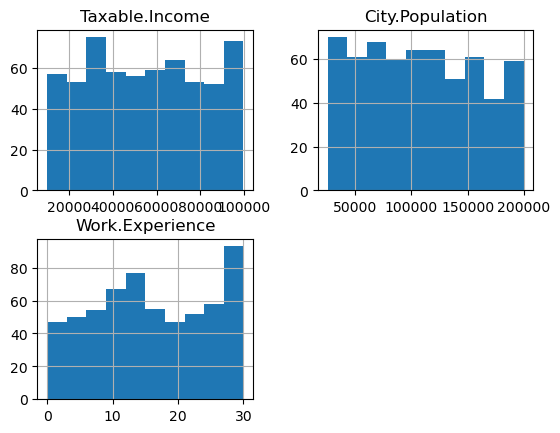

In [7]:
data.hist()

<AxesSubplot:>

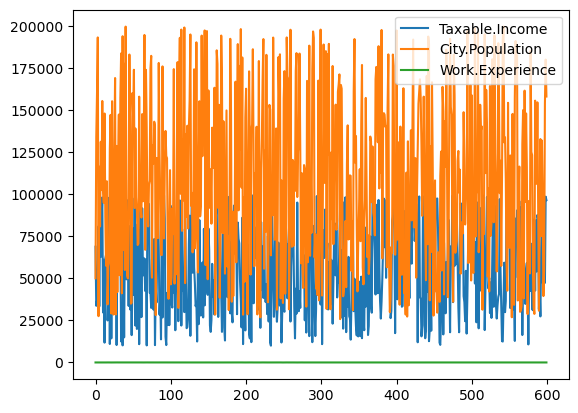

In [8]:
data.plot()

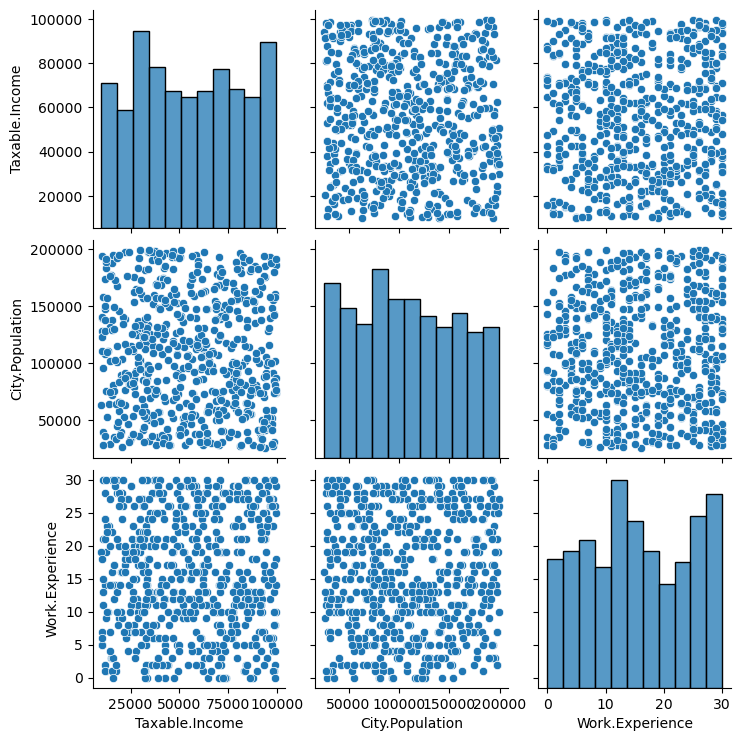

In [9]:
sn.pairplot(data)

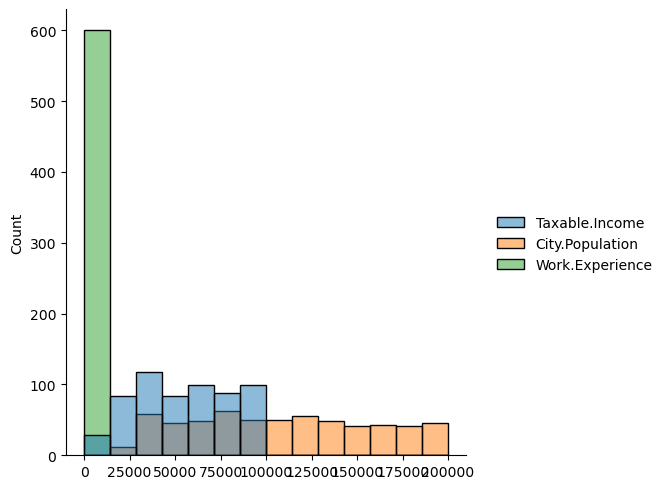

In [10]:
sn.displot(data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

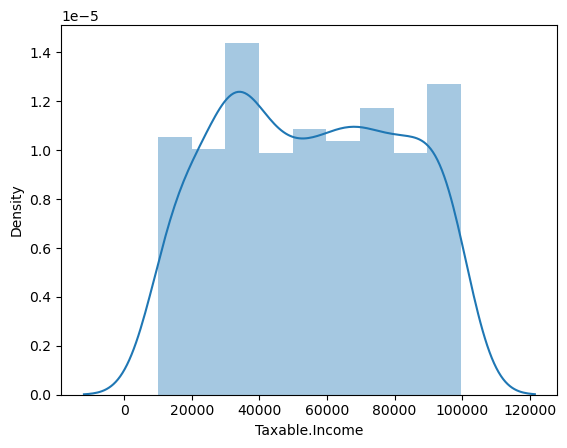

In [11]:
sn.distplot(data["Taxable.Income"])

<AxesSubplot:>

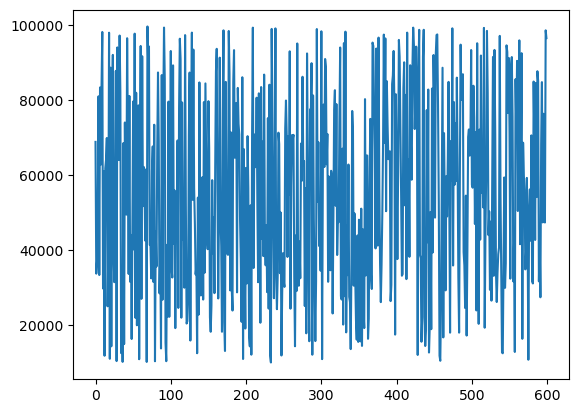

In [12]:
data['Taxable.Income'].plot()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

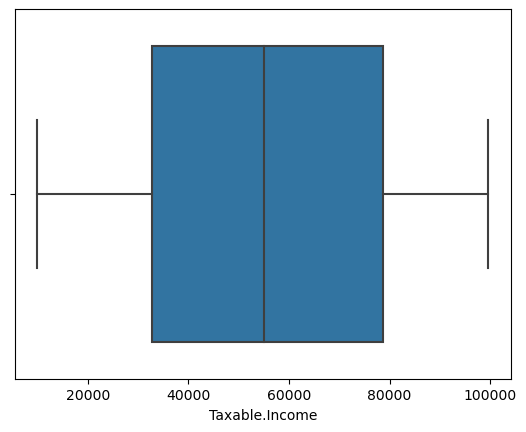

In [13]:
sn.boxplot(data['Taxable.Income'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

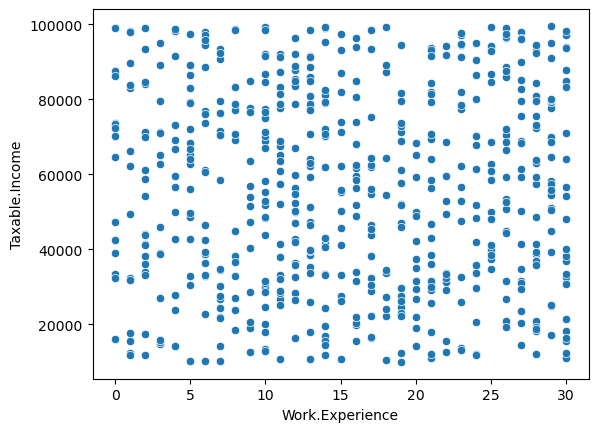

In [14]:
sn.scatterplot(x='Work.Experience',y='Taxable.Income',data=data)

In [15]:
x = pd.get_dummies(data.drop("Taxable.Income",axis=1))
y = data["Taxable.Income"]
y = ['Risky' if value<=30000 else 'Good' for value in y]

In [16]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7316666666666667


In [17]:
entropy = RandomForestClassifier(criterion='entropy', random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(entropy, x, y, cv=kfold)
print(results.mean())

0.7316666666666667


In [18]:
gini = RandomForestClassifier(criterion='gini', random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(gini, x, y, cv=kfold)
print(results.mean())

0.7316666666666667


Ensemble Models

In [19]:
#Bagging 
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(entropy, n_estimators=10, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(bagging_model, x, y, cv=kfold)
print(results.mean())

0.7716666666666667


In [20]:
bagging_model = BaggingClassifier(gini, n_estimators=10, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(bagging_model, x, y, cv=kfold)
print(results.mean())

0.7733333333333333


In [21]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
boosting_model = AdaBoostClassifier(entropy, n_estimators=50, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(boosting_model, x, y, cv=kfold)
print(results.mean())

0.7266666666666667


In [22]:
boosting_model = AdaBoostClassifier(gini, n_estimators=50, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(boosting_model, x, y, cv=kfold)
print(results.mean())

0.73


In [23]:
#Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stacking_model = StackingClassifier(estimators=[('rf_entropy',entropy),('rf_gini',gini),('ada_boost',boosting_model)],stack_method='auto',final_estimator=LogisticRegression(),cv=5)
results = cross_val_score(stacking_model, x, y,cv=5)
print(results.mean())

0.7933333333333332
